## Music Genre Claasification - Exploratory Data Analysis & Data Visualization  

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
from scipy.stats import uniform, randint
import sklearn.preprocessing as skp
from pprint import pprint
import random
import librosa as lib, IPython
import librosa.display as lib_plt

### Data Analysis

### Sample audio file 

In [5]:
music_f = 'Data/genres_original/blues/blues.00004.wav'
data, sr = librosa.load(music_f)
data, _ = librosa.effects.trim(data)

In [6]:
# play sample file
IPython.display.Audio(data, rate=sr)

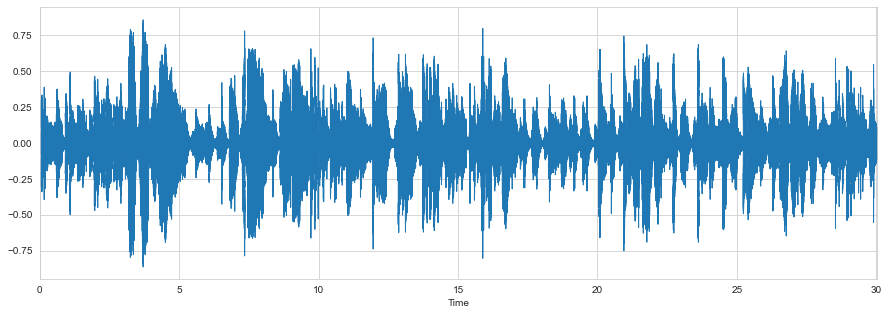

In [10]:
plt.figure(figsize=(15,5))
lib_plt.waveplot(data)
plt.show()

In [11]:
# Default FFT window size
# window size
n_fft = 2048 
# window hop length for STFT
hop_length = 512 



In [12]:
stft = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)



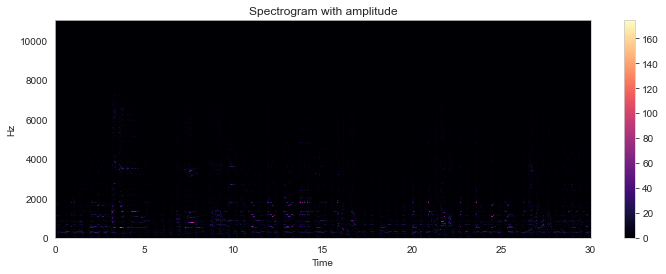

In [15]:
plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()



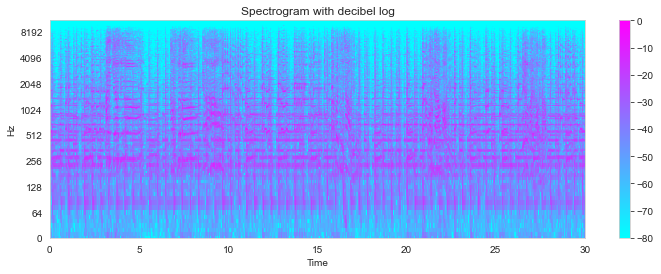

In [16]:
plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

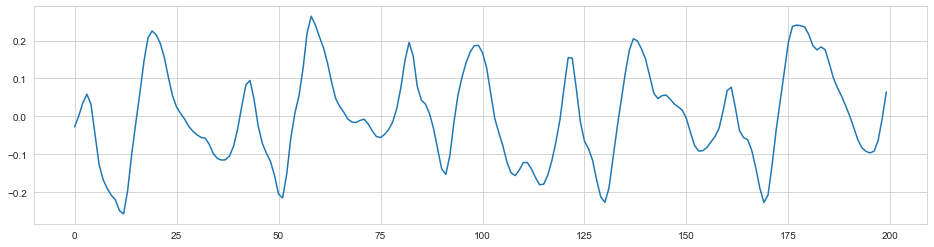

In [17]:
# plot zoomed audio wave 
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(data[start:end])
plt.show()

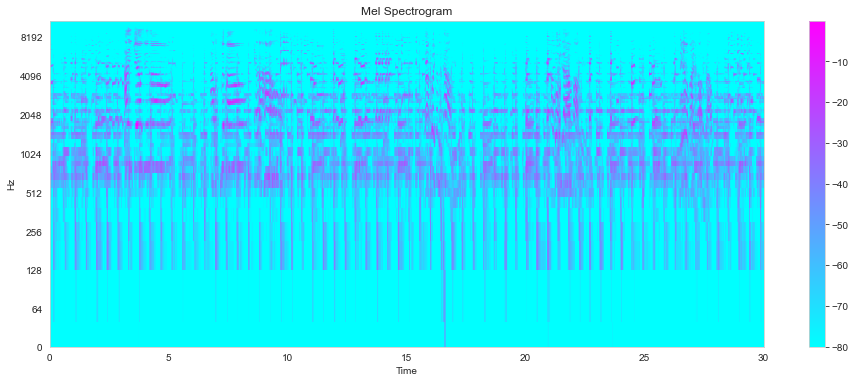

In [21]:
mel_spec = lib.feature.melspectrogram(data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

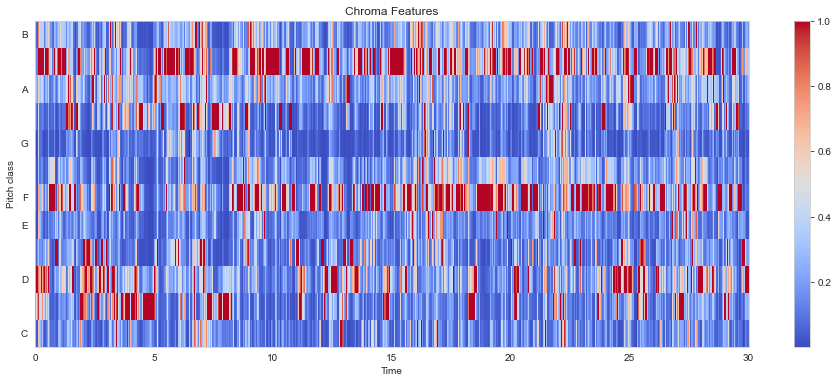

In [22]:
chroma = lib.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

## Create Dataframe

In [25]:
df = pd.read_csv('Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Correlation Matrix

In [26]:

mean_cols = [col for col in df.columns if 'mean' in col]
corr = df[mean_cols].corr()

### HeatMap Visualization

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

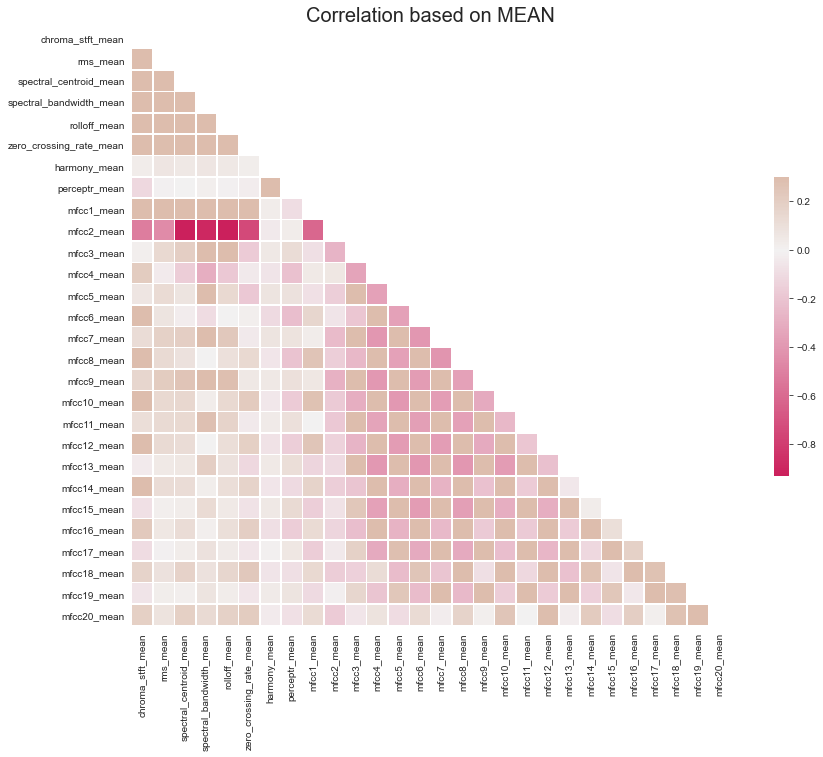

In [29]:

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(16, 11));

cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation based on MEAN', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

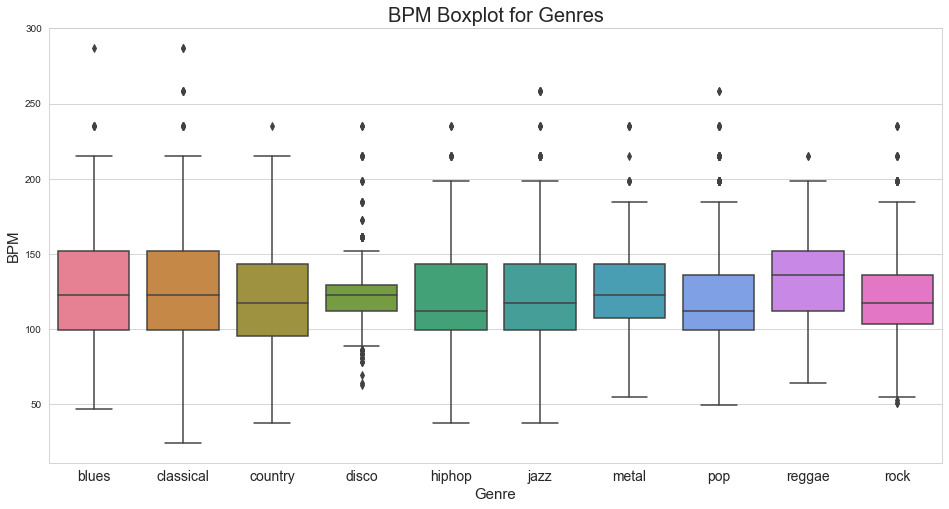

In [30]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [31]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

In [37]:
# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
norm_data = min_max_scaler.fit_transform(X)
X = pd.DataFrame(norm_data, columns = cols)

In [38]:
# Top 2 pca components
pca = PCA(n_components=2)
pca_trans = pca.fit_transform(X)

pca_df = pd.DataFrame(data = pca_trans, columns = ['pc1', 'pc2'])

In [41]:
pca_trans

array([[-0.24216749, -0.12114657],
       [-0.27606151, -0.23029108],
       [-0.19002431, -0.11950928],
       ...,
       [-0.39021614,  0.19788507],
       [-0.31031542, -0.38816163],
       [-0.37790617, -0.10644861]])

Text(0, 0.5, 'Principal Component 2')

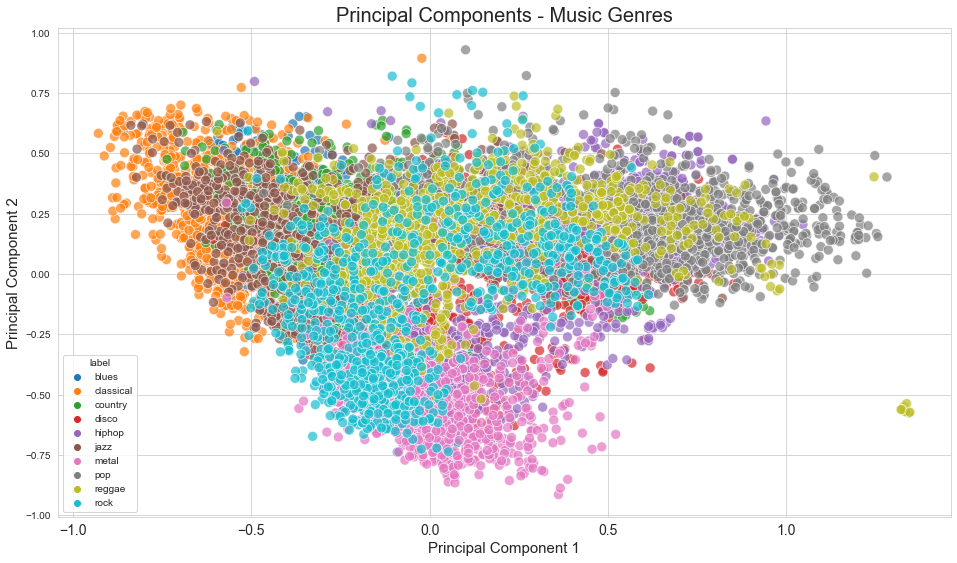

In [40]:
# concatenate with target label
new_df = pd.concat([pca_df, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = new_df, hue = "label", alpha = 0.7, s = 100);

plt.title('Principal Components - Music Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)